# GridSearchCV

scikit-learn 라이브러리에서 제공하는 모델의 최적 하이퍼파라미터를 탐색하는 기능 중 하나.

가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 수행하고, 최적의 조합을 찾는다.

GridSearchCV를 사용하면 모델의 성능을 최적화하고 더 나은 예측 결과를 얻을 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

# 선형회귀분석 모듈
from sklearn.linear_model import LinearRegression

# 하이퍼 파라미터 튜닝을 위한 모듈
from sklearn.model_selection import GridSearchCV

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)
my_pretty_table(origin.head())

+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+


## #02. 데이터 전처리

### [1] 데이터 스케일링

In [3]:
df = my_standard_scaler(origin, yname='무게')
my_pretty_table(df.head())

+----+----------+----------+----------+--------+
|    |     길이 |     높이 |     두께 |   무게 |
|----+----------+----------+----------+--------|
|  0 | -2.18023 | -2.01651 | -1.89617 |    5.9 |
|  1 | -1.58743 |  -1.5187 | -1.56077 |     32 |
|  2 | -1.44203 | -1.41704 | -1.31633 |     40 |
|  3 | -1.30782 |  -1.1471 | -1.20263 |   51.5 |
|  4 |  -1.1736 |  -1.1471 | -1.02641 |     70 |
+----+----------+----------+----------+--------+


### [2] 독립, 종속 변수 분리

In [4]:
yname = '무게'
x = df.drop(yname, axis=1)
y = df[yname]
x.shape, y.shape

((56, 3), (56,))

## #03. 하이퍼파라미터 튜닝을 통한 최적 모델 찾기

선형회귀(LinearRegression), 로지스틱회귀(LogisticRegression) 등의 모델을 제외한 다른 학습 모델들은 클래스 생성자에 전달하는 파라미터가 다양하다.

이 파라미터의 최적 조합을 찾는 과정

만약 선형회귀 모델에 `params1`, `params2`, `params3`라는 파라미터가 필요하다고 가정할 경우

```python
model = LinearRegression(n_job=-1, param1=???, params2=???, params3=???)
```

각 파라미터에 설정할 수 있는 값들을 리스트를 원소로 갖는 딕셔너리 형태로 준비하면 GridSearchCV 클래스가 파라미터를 조합할 수 있는 모든 경우의 수를 수행하고 가장 좋은 성능을 보이는 파라미터 조합을 찾아낸다.

```python
params = {
    "params1": [1, 2, 3],
    "params2": [0.1, 0.01, 0.001],
    "params3": [True, False]
}
```

여기서는 실제 LinearRegression 클래스가 `n_jobs`외의 의미있는 파라미터를 받지 않으므로 빈 딕셔너리를 준비한다.

### [1] 하이퍼 파라미터 튜닝기 생성

In [6]:
model = LinearRegression(n_jobs=-1)

# 하이퍼 파라미터 튜닝을 위한 후보 파라미터
params = {}

# k-fold 회차 정의
fold = 10

# 하이퍼 파라미터 튜닝 객체 생성
grid_cv = GridSearchCV(model, param_grid=params, cv=fold)

# 모델 학습
grid_cv.fit(x, y)

# 최적의 파라미터 조합 확인
grid_cv.best_params_

{}

### [2] 모든 정보 확인

In [7]:
grid_cv.cv_results_

{'mean_fit_time': array([0.00129092]),
 'std_fit_time': array([0.00045472]),
 'mean_score_time': array([0.0009079]),
 'std_score_time': array([0.00030287]),
 'params': [{}],
 'split0_test_score': array([-58.01302285]),
 'split1_test_score': array([-2.31476956]),
 'split2_test_score': array([-45.20722663]),
 'split3_test_score': array([-4.47723355]),
 'split4_test_score': array([-5.3595436]),
 'split5_test_score': array([-17.55200254]),
 'split6_test_score': array([0.62549205]),
 'split7_test_score': array([0.53019652]),
 'split8_test_score': array([-0.05032677]),
 'split9_test_score': array([-17.58452852]),
 'mean_test_score': array([-14.94029654]),
 'std_test_score': array([19.61930517]),
 'rank_test_score': array([1])}

### [3] 학습 성능이 높은 순으로 파라미터 조합을 확인

> 여기서는 출력되는 결과 없음

In [8]:
result_df = DataFrame(grid_cv.cv_results_['params'])
result_df['mean_test_score'] = grid_cv.cv_results_['mean_test_score']
my_pretty_table(result_df.sort_values(by='mean_test_score', ascending=False))

+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          -14.9403 |
+----+-------------------+


### [4] 최적의 파라미터가 적용된 학습 모델

In [9]:
grid_cv.best_estimator_

LinearRegression(n_jobs=-1)

## #04. 도출된 학습 모델을 사용한 분석 결과

+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.942303 |             62.5758 |             6847.54 |          82.7499 |                         124.554 |               97.1079 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |     t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------

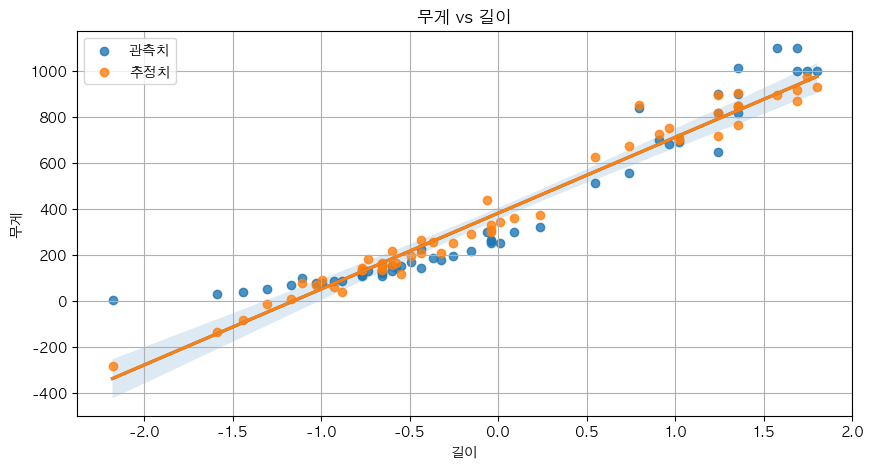

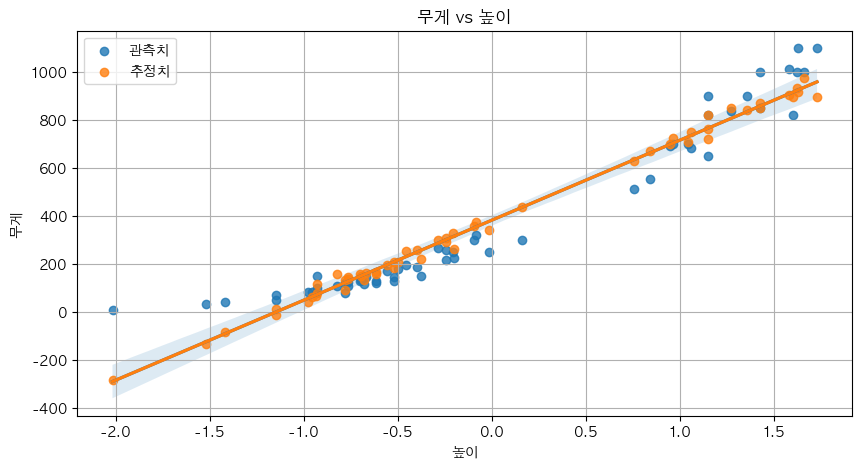

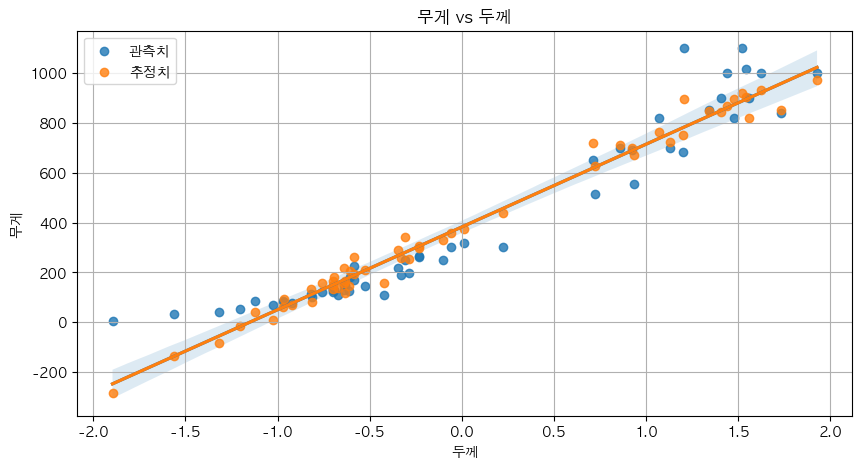



[잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


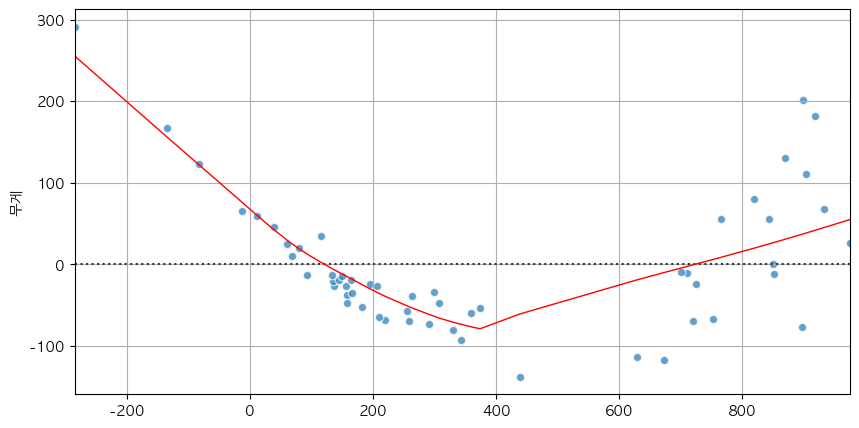


[잔차의 정규성 가정]


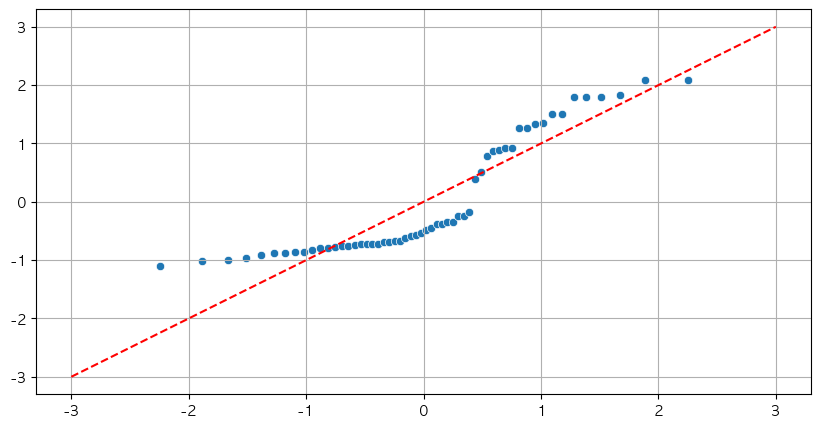

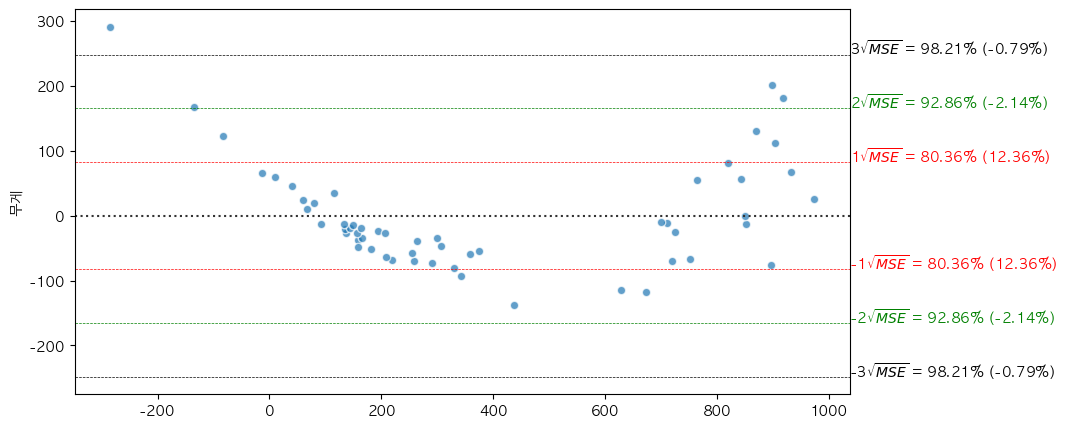

루트 1MSE 구간에 포함된 잔차 비율: 80.36% (12.357142857142861)
루트 2MSE 구간에 포함된 잔차 비율: 92.86% (-2.142857142857139)
루트 3MSE 구간에 포함된 잔차 비율: 98.21% (-0.7857142857142918)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: True
+-----------+----------+
|           |   values |
|-----------+----------|
| statistic |  2.48228 |
| p-value   | 0.478502 |
| f-value   | 0.803962 |
| f p-value | 0.497364 |
+-----------+----------+

[잔차의 독립성 가정]
Durbin-Watson: 0.484890047568765, 잔차의 독립성 가정 만족 여부: False


In [ ]:
my_linear_regrassion_result(grid_cv.best_estimator_, x, y, use_plot=True, report=True, resid_test=True, dpi=100)